In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
加载TensorFlow自带的数据集：boston_housing、cifar10、cifar100、fashion_mnist、imdb、mnist、reuters

In [ ]:
dataset = tf.keras.datasets.mnist
#在这里切换数据集就可以了
(x_train, y_train), (x_test, y_test) = dataset.load_data()

In [ ]:
输出数据集的结构

In [ ]:
type(x_train)
#查看类型是numpy数组

numpy.ndarray

In [ ]:
x_train.shape
#查看维度

(60000, 28, 28)

In [ ]:
len(x_train)
#查看长度

60000

In [ ]:
x_train
#看看训练图像的数据

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
x_train[0]
#看看第一个图像的数据

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
type(y_train)
#训练标签的类型

numpy.ndarray

In [ ]:
y_train.shape
#训练标签的维度

(60000,)

In [ ]:
y_train
#看看训练标签

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train[0]
#第一个训练标签是数字5

5

In [ ]:
显示一张图像

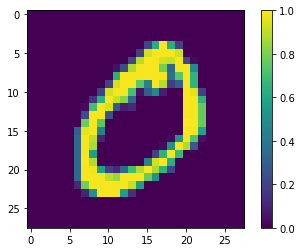

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[1])#在这里修改是第几个图像
plt.colorbar()
plt.grid(False)
plt.show()

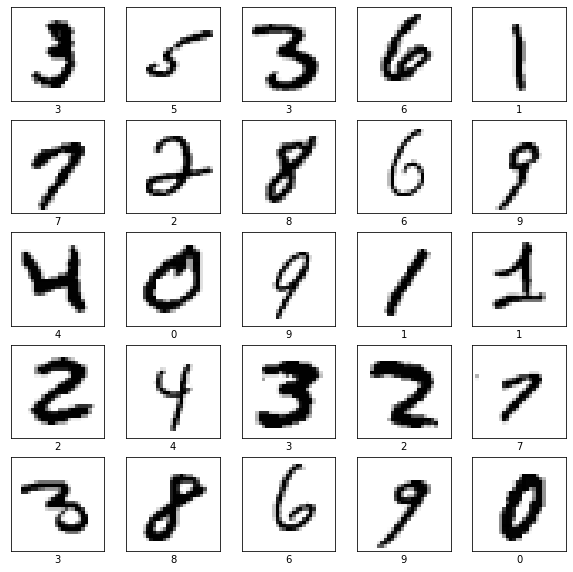

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i+10], cmap=plt.cm.binary)
    plt.xlabel(y_train[i+10])#在这里修改是哪25张图
plt.show()

In [ ]:
图像数据归一化到0-1

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
构建序列模型

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
#mnist

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
#卷积神经网络输入从三维改到四维

In [ ]:
#卷积神经网络
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, (5, 5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(16, (5, 5), padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
#卷积神经网络

In [ ]:
编译模型

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
#mnist

In [ ]:
训练模型

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0526 - accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0323 - accuracy: 0.9899
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0249 - accuracy: 0.9921
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0208 - accuracy: 0.9934
Epoch 5/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0129 - accuracy: 0.9957
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0122 - accuracy: 0.9960
Epoch 8/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0093 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 10/10
1875/1875 [==============================] - 17s 9ms/step - l

In [ ]:
#卷积神经网络
model.fit(x_train, y_train, validation_split=0.2,
                    epochs=10, batch_size=200, verbose=2)

Epoch 1/10
240/240 - 11s - loss: 0.3853 - accuracy: 0.8875 - val_loss: 0.1286 - val_accuracy: 0.9618
Epoch 2/10
240/240 - 11s - loss: 0.1087 - accuracy: 0.9673 - val_loss: 0.0818 - val_accuracy: 0.9749
Epoch 3/10
240/240 - 12s - loss: 0.0746 - accuracy: 0.9778 - val_loss: 0.0721 - val_accuracy: 0.9767
Epoch 4/10
240/240 - 11s - loss: 0.0593 - accuracy: 0.9820 - val_loss: 0.0553 - val_accuracy: 0.9837
Epoch 5/10
240/240 - 10s - loss: 0.0493 - accuracy: 0.9845 - val_loss: 0.0517 - val_accuracy: 0.9847
Epoch 6/10
240/240 - 10s - loss: 0.0416 - accuracy: 0.9870 - val_loss: 0.0472 - val_accuracy: 0.9864
Epoch 7/10
240/240 - 10s - loss: 0.0339 - accuracy: 0.9898 - val_loss: 0.0487 - val_accuracy: 0.9852
Epoch 8/10
240/240 - 11s - loss: 0.0321 - accuracy: 0.9901 - val_loss: 0.0452 - val_accuracy: 0.9870
Epoch 9/10
240/240 - 11s - loss: 0.0261 - accuracy: 0.9918 - val_loss: 0.0531 - val_accuracy: 0.9843
Epoch 10/10
240/240 - 10s - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0458 - val_accura

In [ ]:
验证测试模型

In [ ]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0363 - accuracy: 0.9910


[0.03625590354204178, 0.9909999966621399]

In [ ]:
y_test[0]
#第一张测试图像是7

7

In [ ]:
predictions = model.predict(x_test)
#获取整个测试集的预测结果集

In [ ]:
predictions[0]
#看看第一个预测结果，第7个值是1

array([4.8201536e-09, 6.0260832e-09, 9.7660086e-06, 7.0423710e-05,
       8.6156846e-12, 2.2726979e-08, 2.1170571e-13, 9.9991918e-01,
       2.1494174e-08, 5.9570476e-07], dtype=float32)

In [ ]:
np.argmax(predictions[0])
#在第一个预测结果中求最大值，是第7，和测试图像对上了

7

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

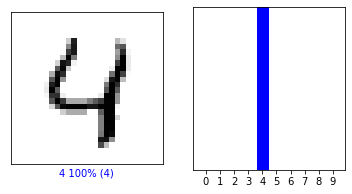

In [ ]:
i = 4 
#看第几个图像的结果就修改成几
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

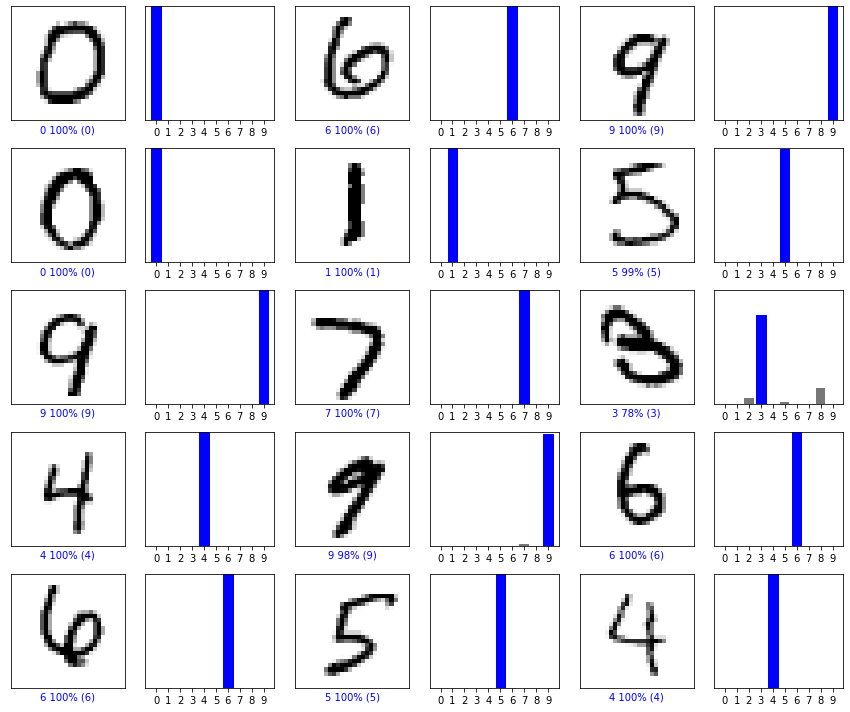

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+10, predictions[i+10], y_test, x_test)#可以修改下标
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+10, predictions[i+10], y_test)#可以修改下标
plt.tight_layout()
plt.show()

In [ ]:
x_test[0].shape

(28, 28)

In [ ]:
img = (np.expand_dims(x_test[0],0))
img.shape
#预测单张图像也要构建一个集合

(1, 28, 28)

In [ ]:
predictions = model.predict(img)
predictions

array([[4.8201629e-09, 6.0260947e-09, 9.7660268e-06, 7.0423710e-05,
        8.6157010e-12, 2.2726979e-08, 2.1170571e-13, 9.9991918e-01,
        2.1494214e-08, 5.9570533e-07]], dtype=float32)

In [ ]:
y_test[0]

7

In [ ]:
np.argmax(predictions[0])

7

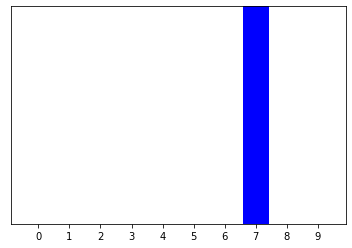

In [ ]:
plot_value_array(0, predictions[0], y_test)

In [ ]:
保存模型

In [ ]:
#看看模型的结构
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save_weights('./checkpoints/my_checkpoint')#只保存权重

In [ ]:
model.save('saved_model/my_model')#保存整个模型

INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [ ]:
加载模型

In [ ]:
#重新建立一个相同的model2
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#新建模型测试应该是0
model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 2.4410 - accuracy: 0.1057


[2.4409584999084473, 0.10570000112056732]

In [ ]:
model2.load_weights('./checkpoints/my_checkpoint')

In [ ]:
#载入模型后再测试就是97%
model2.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0721 - accuracy: 0.9781


[0.07210680842399597, 0.9781000018119812]

In [ ]:
model3 = tf.keras.models.load_model('saved_model/my_model')#直接加载新建整个模型

In [ ]:
model3.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0721 - accuracy: 0.9781


[0.07210680842399597, 0.9781000018119812]

In [ ]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5292883e-50a7-4f1d-9f12-778c1d6da182' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>